İhityaç Duyacağımız kütüphaneleri ekliyoruz

pandas => csv, txt, excel ve benzeri dosyaları okuyup yüklemek ve veri işleme işlemlerini gerçekleştirmek için kullanacağız.

numpy => Çok boyutlu diziler üzerinde matematiksel işlemleri hızlı ve kolay bir şekilde yapmak için kullanacağız.

matplotlib => Grafik oluşturmak veri görselleştirmek için kullanacağız.

seaborn => Grafik oluşturmak veri görselleştirmek için kullanacağız.

Bu kütüphaneleri kullanarak verimizi yükleyip görselleştirmesini gerçekleştireceğiz.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Örnek Veri setimiz : https://drive.google.com/file/d/1JqTYmtsCuy6fZMIiQ7ZnK0VoIInSNuy-/view?usp=sharing

In [6]:
!gdown --id 1JqTYmtsCuy6fZMIiQ7ZnK0VoIInSNuy-

'gdown' is not recognized as an internal or external command,
operable program or batch file.


Pandas kütüphanesini kullanarak veri setimizi dosyadan okuyarak yüklüyoruz.


In [7]:
EvFiyatlari = pd.read_csv("evfiyatlari.csv")

In [8]:
EvFiyatlari

,MetreKare,YatakOdasi,Banyo,Fiyat
0,1790,2,2,114300
1,2030,4,2,114200
2,1740,3,2,114800
3,1980,3,2,94700
4,2130,3,3,119800
...,...,...,...,...
123,1900,3,3,119700
124,2160,4,3,147900
125,2070,2,2,113500
126,2020,3,3,149900


Yüklediğimiz veri seti ile ilgili info metodunu kullanarak bilgi alabiliriz.

In [9]:
EvFiyatlari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MetreKare   128 non-null    int64
 1   YatakOdasi  128 non-null    int64
 2   Banyo       128 non-null    int64
 3   Fiyat       128 non-null    int64
dtypes: int64(4)
memory usage: 4.1 KB


In [10]:
print(EvFiyatlari.shape)

(128, 4)


head metodu ile veri setinde yer alan ilk kayıtları inceliyebiliriz.

In [11]:
EvFiyatlari.head()

,MetreKare,YatakOdasi,Banyo,Fiyat
0,1790,2,2,114300
1,2030,4,2,114200
2,1740,3,2,114800
3,1980,3,2,94700
4,2130,3,3,119800


Seaborn kütüphanesinin pairplot metodunu kullanarak veri dağılımlarını incelemek için hızlı bir şekilde veriyi görselleştirebiliriz.

pairplot(), tüm veri çerçevesi boyunca, sayısal sütunlar için çift yönlü ilişkiler çizer.


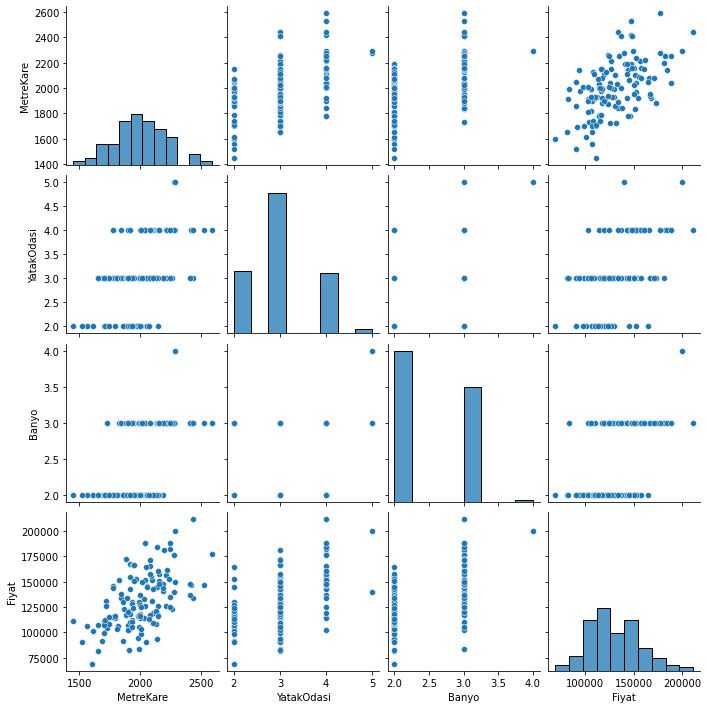

In [24]:
sns.pairplot(EvFiyatlari);

Makine öğrenmesi modelimizi geliştirmek için ilk adımımız bağımlı ve bağımsız değişkenlerimizi belirlemektir.Örneğimizde Ev fiyatlarını tahmin etmeye çalışacağımızdan bağımlı değişkenimiz fiyat alanı olacaktır. Bu alan dışındaki sütunlarımız bağımsız değişkenlerimiz olacaktır.

In [13]:
X = EvFiyatlari[["MetreKare","YatakOdasi","Banyo"]]
y = EvFiyatlari[["Fiyat"]]

sklearn kütüphanesinden kullanmak istediğimiz Makine öğrenmesi modelini import edelim.

Çalışmamızda kullanacağımız LinearRegression modeli sklearn.linear_model içerisinde bulunmaktadır.

Bu modeli import ederek kendi modelimizi oluşturalım.

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Oluşturduğumuz modelin öğrenme işlemini gerçekleştirmek için Öğrenme için kullanacağı bağımlı ve bağımsız değişkenleri fit metoduna göndererek gerçekleştirebiliriz.

In [15]:
model.fit(X,y)

LinearRegression()

modelimizin doğrusal denklemini görmek için coef_ ve intercept_ özelliklerine bakabiliriz.

In [16]:
print(model.coef_)
print(model.intercept_)

[[   35.64264904 10459.92594198 13546.13433454]]
[-5640.8332697]


Modelimizin ev fiyatı tahmin etmek için kullanacağı formül

fiyat = (Metrekare * 35.64264904) + (YatakOdasi * 10459.92594198) + (Banyo * 13546.13433454) + (-5640.8332697)

modelimize tahmin yaptırmak için kullanabileceğimiz metod predict metodudur.

In [17]:
modelTahmin =  model.predict([[1000,2,1]])


hesaplananFiyat = (1000 * 35.64264904 ) + (2 *  10459.92594198) + (1 * 13546.13433454 ) -5640.8332697
print("Modelin Tahmini : ", modelTahmin)
print("Hesaplanan Fiyat : ", hesaplananFiyat)
#İki hesaplama arasında çok düşük farkın nedeni modelimizin katsayıları çok daha yüksek hassasiyet ile tutmasından kaynaklanır.

Modelin Tahmini :  [[64467.80198935]]
Hesaplanan Fiyat :  64467.8019888


C:\Users\busra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Modelimizin başarısını test etmek için bütün test verilerimiz için birer tahmin gerçekleştirerek bu verilerin gerçek değerleri ile tahmin edilen değerlerini karşılaştırmamız gerekmektedir.

Bunun için predict metoduna X değişkeninde yer alan tüm verilerimi gönderebiliriz.

In [18]:
y_head = model.predict(X)

Tahmin sonuçlarını ve gerçek değerleri daha rahat inceleyebilmek için yanyana yanyana yer alacağı bir formata getirebiliriz.

In [19]:
tahmin_ve_sonuclar = pd.DataFrame({"Gerçek Değerler" : y.values.reshape(-1,),
                                   "Tahminler" : y_head.reshape(-1,)})
tahmin_ve_sonuclar.head()

,Gerçek Değerler,Tahminler
0,114300,106171.629066
1,114200,135645.716720
2,114800,114849.422556
3,94700,123403.658326
4,119800,142296.190016


Yaptığımız tahminler ile gerçek fiyatların durumunu görmek için bir grafik çizdirebiliriz.


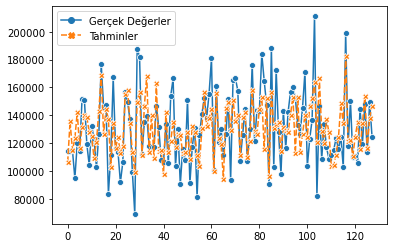

In [25]:
sns.lineplot(data=tahmin_ve_sonuclar,markers=True);

Sonuçları sadece görsel olarak görmek çoğu zaman yeterli değildir. Yaptığımız tahminlerin hata değerlerini hesaplamak gereklidir.

Modellerimizin başarılarını ölçmek için ihtiyaç duyacağımız metodlar sklearn kütüphanesinde metrics modülü altında yer almaktadır.

Projemize bu metodları ekleyerek başarı hesaplamalarımız gerçekleştirebiliriz.

In [21]:
from sklearn import metrics
HataDegeri = metrics.mean_squared_error(y.values.reshape(-1,), y_head.reshape(-1,))
print("Ortalama Kare Hatası :" , HataDegeri)

Ortalama Kare Hatası : 401439264.25173926


In [22]:
x = np.array([1,2,3,4,5,6,7,8,9])
x = x.reshape(-1,3)
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [26]:
x.shape

(3, 3)

In [37]:
from sklearn.model_selection import train_test_split

# Veri setinizi bağımsız değişkenler (X) ve hedef değişken (y) olarak ayırın
X = EvFiyatlari[['MetreKare', 'YatakOdasi', 'Banyo']]
y = EvFiyatlari['Fiyat']

# Veriyi eğitim ve test verilerine bölmek (örneğin, %80 eğitim, %20 test olarak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Burada, X_train ve y_train eğitim verilerini, X_test ve y_test ise test verilerini temsil eder.

In [38]:
from sklearn.linear_model import LinearRegression

# Lineer regresyon modelini oluşturun
model = LinearRegression()

# Modeli eğitin
model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Modeli test verileri ile değerlendirin
y_pred = model.predict(X_test)

# Başarıyı değerlendirme ölçütlerini kullanarak değerlendirin (örneğin, R^2 skoru)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Skoru: {r2}')


R^2 Skoru: 0.4568195777548879


R^2 skoru, modelinizin ne kadar iyi tahmin yaptığını değerlendiren bir ölçüttür. 1'e ne kadar yakınsa, model o kadar iyi tahminler yapıyor demektir.

0.45 sonucuna baktığımızda modelimizin çok da iyi sonuç vermediğini görüyoruz.

Bu oranı 1e daha da yaklaştırmak için bir yöntem daha denemek istiyorum.

Veri Setini Karıştırma 
Veri setinizi ayırmadan önce verileri karıştırmanız genellikle iyidir. Bu, verilerin sıralı veya gruplanmış olma durumlarını önler ve modelinizin daha iyi genelleme yapmasına yardımcı olabilir. Belki bu yöntem modelimizin verimliliğini arttırır.

In [40]:
# Veri setini karıştırın
EvFiyatlari_karistirilmis = EvFiyatlari.sample(frac=1, random_state=42)

# Karıştırılmış veriyi görüntüleyin
print(EvFiyatlari_karistirilmis)

     MetreKare  YatakOdasi  Banyo   Fiyat
55        1720           2      2  125700
40        1560           2      2  106600
19        1920           3      3  167200
31        1930           2      2  112300
98        2060           3      2  145500
..         ...         ...    ...     ...
106       2130           3      2  108500
14        2590           4      3  176800
92        2110           3      2  142600
51        1860           2      2   91100
102       2410           3      3  136800

[128 rows x 4 columns]


Veri setini karıştırdım. şimdi geri kalan adımları geröekleştireceğim ve veri setini train ve test olmak üzere ikiye böleceğim.

In [41]:
from sklearn.model_selection import train_test_split

# Veri setinizi bağımsız değişkenler (X) ve hedef değişken (y) olarak ayırın
X = EvFiyatlari_karistirilmis[['MetreKare', 'YatakOdasi', 'Banyo']]
y = EvFiyatlari_karistirilmis['Fiyat']

# Veriyi eğitim ve test verilerine bölmek (örneğin, %80 eğitim, %20 test olarak)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.linear_model import LinearRegression

# Lineer regresyon modelini oluşturun
model = LinearRegression()

# Modeli eğitin
model.fit(X_train2, y_train2)


LinearRegression()

In [43]:
# Modeli test verileri ile değerlendirin
y_pred2 = model.predict(X_test2)

# Başarıyı değerlendirme ölçütlerini kullanarak değerlendirin (örneğin, R^2 skoru)
from sklearn.metrics import r2_score
r2 = r2_score(y_test2, y_pred2)
print(f'R^2 Skoru: {r2}')


R^2 Skoru: 0.4395502515554778
